<a href="https://colab.research.google.com/github/imbiotech/skbtML/blob/main/4-1.Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `4-1.Decision Tree Model`
* `n개의 분류 기준(Root Node)에 따라 데이터를 분류(n-depth)`하여 Target 값(Leaf)를 찾아가는 과정을 학습하는 모델
* Root Node를 설정할 때는 `데이터의 복잡성(Entropy)의 총합이 가장 크게 줄어드는 방향`<br/>`(정보 이득이 최고가 되는 방향)`으로 설정해야 함
    >`정보 이득이란?`: 분류 전 복잡성과 분류 후 복잡성의 차, 높을 수록 좋음
* 설정된 Root Node에 따라 나뉘어진 데이터는 분포가 바뀜
* 복잡성이 줄어드는 방향으로 계속 Classify를 하다가 일정 수준 이상이 되면 멈춤
* DTM의 가장 기본적인 역할은 `Class Data(범주형 데이터)를 예측하는 것`
* DTM을 위한 알고리즘은 다양하게 있으며 그 중 CART, C4.5, C5.0이 가장 많이 사용되며
    <br/>대부분의 DTM 알고리즘은 다음과 같은 공통점을 지님
    - 엔트로피를 사용
    - 지니계수를 사용
    - Data Classify에 사용
    - 가장 영향력이 큰 속성을 사용


<!-- <img src="클로드 샤논의 엔트로피 정의 공식"> -->

* log_{2}를 사용하는 이유는 0, 1 두 개의 bit로 나누기 위함
* i = 물건의 종류
    * ex) 빨간색, 파란색 등
* n = 총 종류의 수
    * ex) 빨간색과 파란색의 총 합
* 확률 p = 전체 데이터에서 특정 데이터가 차지하는 비율
    * ex) 전체 공에서 빨간색 공의 비율
* 필요한 모든 bit(1)에 해당하는 확률을 평균한 값 = 엔트로피


*


* DTM에 Regression을 결합할 수 있음
    * Leaf를 통해 Regression 진행, 분류형 뿐만 아니라 연속형 데이터에서도 사용 가능함(Regression Tree Model)

* 데이터의 불순도는 엔트로피를 사용해서 평가하는데 log가 들어가기 때문에 계산 속도가 느림.

    이와같은 문제의 개선을 위해 지니계수나 카이 제곱 스퀘어를 사용하기도 함

    * 지니계수:

        엔트로피 방법 대비 빠른 평가가 가능함

    * 카이 제곱 테스트(Chi-squared Test, CST): 데이터의 독립성 검정을 위해 사용하는 지표

        엔트로피 방법에서는 데이터의 불순도를 가장 낮추는 방향으로 분류한다면

        카이 제곱 스퀘어에서는 데이터의 상관 관계가 가장 적어지도록 하는 방향으로 분류


---
#### 코드블럭1
**_Decision Tree Model 예시 코드 1 시작_**<br/>
8*8 크기의 숫자 손글씨를 분석하여 각 이미지를 적절한 숫자로 분류하는 Decision Tree Model의 실습 코드

In [39]:
# 1.필요한 library 받아오기

import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

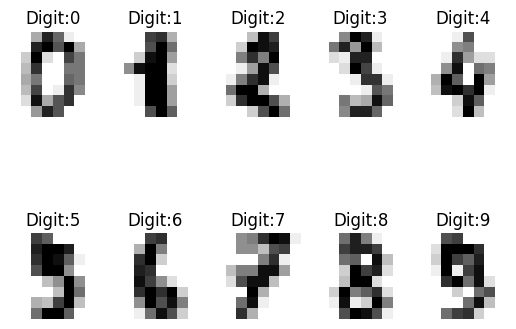

In [38]:
# 2.필요한 데이터 불러오기

# 숫자 손글씨 데이터를 불러옴 (0~9까지의 숫자를 손으로 쓴 이미지 데이터 1797개)
digits = datasets.load_digits() 

# 이미지를 표시함.
for label, img in zip(digits.target[:10], digits.images[:10]):  
    # 10 개의 이미지 표시를 위해 2행 5열의 subplot을 만듬
    plt.subplot(2, 5, label+1) 
    # 축 삭제
    plt.axis('off') 
    # 이미지 표시, gray_r: 회색, nearest: 가장 가까운 값으로 보간 (이미지를 확대하거나 축소할 때 픽셀 사이의 값을 채우는 방법)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    # 제목 표시
    plt.title('Digit:{0}'.format(label)) 
# 이미지를 화면에 표시
plt.show()

In [ ]:
# 3.데이터 전처리

# 1798 개의 손글씨 데이터를 데이터(x)와 결과(y)로 나눠 저장
images = digits.images # (1797, 8, 8) 크기의 이미지 데이터
labels = digits.target # (1797,) 크기의 숫자 데이터

# 8*8 이미지 * 1797개를 64 픽셀 벡터 * 1797개로 변환
images = images.reshape(images.shape[0], -1) # (1797, 64) 크기의 이미지 데이터

# 훈련 데이터와 테스트 데이터로 분리
n_samples = len(images) # 샘플 수
train_size = int(n_samples * 2 / 3) # 훈련 데이터 수(전체 샘플 수의 2/3, 1198)
classifier = tree.DecisionTreeClassifier(max_depth=3) # DCM 생성, depth는 3으로 설정
classifier.fit(images[:train_size], labels[:train_size]) # 훈련 데이터로 모델 훈련

In [ ]:
# 4.모델 평가

# 테스트 데이터로 예측
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

# 정확도 측정
print('Accuracy:\n', accuracy_score(expected, predicted))

# 오차 행렬(혼돈 행렬), 출력 결과가 대각선 방향으로 높은 값이 나오는 것이 좋음
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

In [ ]:
# 최적의 깊이를 찾기 위한 반복적인 fitting 실행
score_list = []
for depth in range(1,100):
    dtr = tree.DecisionTreeClassifier(max_depth=depth)
    dtr.fit(images[:train_size], labels[:train_size])
    score_list.append(dtr.score(images[:train_size], labels[:train_size]).round(4))

# 확인된 최적 깊이와 그 때 fitting score 확인
opt_depth = score_list.index(max(score_list))+1

# 최적의 깊이를 갖는 트리 모델 생성 및 훈련
classifier_opt = tree.DecisionTreeClassifier(max_depth=opt_depth)
classifier_opt.fit(images[:train_size], labels[:train_size])

# 테스트 데이터로 예측
expected = labels[train_size:]
predicted = classifier_opt.predict(images[train_size:])

# 정확도 측정
print('Accuracy:\n', accuracy_score(expected, predicted))

# 오차 행렬
print('Confusion matrix:\n', confusion_matrix(expected, predicted))

**_Decision Tree Model 예시 코드 1  종료_**

---

---
#### 코드블럭2
**_Decision Tree Model 예시 코드 2 시작_**<br/>
붓꽃(Iris)의 4가지 특징 데이터를 분석하여 각 붓꽃을 적절한 종으로 분류하는 Decision Tree Model의 실습 코드

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

iris = datasets.load_iris() # 붓꽃 데이터 불러오기

# iris 데이터(꽃의 SL, SW, PL, PW 측정값, 꽃의 종류)의 0~2번째 데이터 출력
iris.data[:3], iris.target[:3]

**참고**
* Iris flower dataset은 대표적인 머신 러닝과 패턴 인식 분야에서 사용되는 유명한 데이터셋 중 하나입니다.
* 이 데이터셋은 통계학자인 Ronald Fisher에 의해 소개되었으며, 아이리스라는 세 종류의 붓꽃에 대한 측정값을 포함하고 있습니다.
* 전체 데이터셋은 150개의 샘플로 이루어져 있으며, 각각의 꽃마다 4개의 특성(꽃받침의 길이와 너비, 꽃잎의 길이와 너비)을 가지고 있습니다.
* 이 데이터셋은 머신 러닝의 기초적인 예제로 많이 활용되며, 데이터 시각화, 분류, 군집화 등의 다양한 머신 러닝 기술을 학습하거나 테스트하는 데 자주 사용됩니다.
* 데이터셋에는 아래와 같은 정보가 포함되어 있습니다:
    * 꽃받침(sepal)의 길이(length)와 너비(width)를 측정한 값(SL, SW)
    * 꽃잎(petal)의 길이(length)와 너비(width)를 측정한 값(PL, PW)
    * 꽃의 종류(세 종류의 아이리스 꽃: Setosa, Versicolor, Virginica)

* Iris flower data set? https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
# Classify 형식의 DTM 생성
clf = DecisionTreeClassifier(random_state=0)

# 모델 성능 평가를 위한 교차 검증 실시 및 정확도 측정, cv=10: 교차 검증 횟수를 10회로 설정
cross_val_score(clf, iris.data, iris.target, cv=10)

**교차 검증**

* 교차 검증은 데이터 내에서 랜덤으로 선택된 훈련/검증 데이터로 모델을 생성하고 해당 모델을 검증하는 과정을 반복하는 것
* 교차 검증 과정 중 0.9 이상의 값이 나온다면, 해당 데이터의 예측에 DTM을 사용해도 된다는 것을 의미
* 교차 검증은 일반적으로 100개 이하의 데이터에서는 검증 횟수를 10회 정도로 잡으며, 데이터양이 늘어날 수록 적절히 교차 검증 횟수를 늘려 나가야 검증 효율이 올라감
* 단, 데이터의 양이 적을 때 검증 횟수를 늘릴 경우, 모델의 성능이 저하될 수 있음

In [ ]:
# 모델 훈련 및 훈련된 모델을 사용하여 각 꽃의 [SL, SW, PL, PW] 값을 입력하면 해당 꽃의 종류를 출력
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:3])

# 예측 결과와 실제 결과 비교
print(iris.target == clf.predict(iris.data))

# 생성된 DTM의 정확도 계산
np.mean(iris.target == clf.predict(iris.data))

**_Decision Tree Model 예시 코드 2 종료_**

---